In [1]:
quit()

In [22]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as patches
#from prettytable import PrettyTable
#import utils_DRFPMI as utl
from scipy import constants
from scipy import special
#import utils_DRMI as DRMI
#%matplotlib qt

%matplotlib inline
#%matplotlib tk
#pykat.init_pykat_plotting(dpi=90)
pi = constants.pi

In [23]:
def Load_fp_model():
    base = finesse.kat()
    base.verbose =True
    base.parse("""
    # ======== Constants ========================
        const f1 16.881M
        const f2 45.0159M
        const mf1 -16.881M
        const mf2 -45.0159M
        const a 0.686
        const phi_PRM 90
        const pi 3.1415
        const phi_SRM 90
        maxtem 1
    # ======== Input optics =====================
        l i1 1 0 n0
        s s_eo0 0 n0 n_eo1
        mod eom1 $f1 0.15 1 pm n_eo1 n_eo2
        s s_eo1 0 n_eo2 n_eo3
        mod eom2 $f2 0.15 1 pm n_eo3 n_eo4
        s s_eo2 0 n_eo4 n_eo5
        bs refl 0.0001 0.9999 0 45 n_eo5 dump npr nREFL   #REFL
        s sgouy 0 nREFL nREFL2
        attr sgouy g 0
        s bsm 0 npr nx1	
    # ======== Thick ITMs ======================
        m IXAR 0     1     0 nx1 nx2
        s thick_IX 0.15 1.754 nx2 nx3
    # ========== Arm     =======================
        m ITMX 0.996 0.004 0 nx3 nx4
        s sx1 3000 nx4 nx5
        m ETMX 0.999945 10e-06 0 nx5 nTMSX

    # ========== Cavity     =======================
        cav xarm ITMX nx4 ETMX nx5

    # =========  HOM Expansion =======
        attr ITMX Rc -1900.   # measured -1904.6
        attr ETMX Rc 1900.    # measured  1908.24
        attr IXAR Rc 0

    # ========== Command     =======================
        trace 8
    """)
    return base

In [24]:
def Load_prfp_model():
    base = finesse.kat()
    base.parse("""
    # ======== Constants ========================
        const f1 16.881M
        const f2 45.0159M
        const mf1 -16.881M
        const mf2 -45.0159M
        const a 0.686
        const phi_PRM 90
        const pi 3.1415
        const phi_SRM 90
        maxtem 1
    # ======== Input optics =====================
        l i1 1 0 n0
        s s_eo0 0 n0 n_eo1
        mod eom1 $f1 0.15 1 pm n_eo1 n_eo2
        s s_eo1 0 n_eo2 n_eo3
        mod eom2 $f2 0.15 1 pm n_eo3 n_eo4
        s s_eo2 0 n_eo4 n_eo5
        bs refl 0.0001 0.9999 0 45 n_eo5 dump npr nREFL   #REFL
        s sgouy 0 nREFL nREFL2
        attr sgouy g 0
        s bsm 0 npr nx1	
    # ======= PRC each mirror loss 45ppm =======
        # PRC
        m PRM 0.899955 0.1 $phi_PRM nx1 npr1
        s sLpr3 66.597 npr1 npr6 #41.597+25 
    # ======== Thick ITMs ======================
        m IXAR 0     1     0 npr6 nx2
        s thick_IX 0.15 1.754 nx2 nx3
    # ========== Arm     =======================
        m ITMX 0.996 0.004 0 nx3 nx4
        s sx1 3000 nx4 nx5
        m ETMX 0.999945 10e-06 0 nx5 nTMSX

    # ========== Cavity     =======================
        cav xarm ITMX nx4 ETMX nx5
        attr ITMX Rc -1900.   # measured -1904.6
        attr ETMX Rc 1900.    # measured  1908.24
        attr IXAR Rc 0
    # ========== Command     =======================
        trace 8
    """)
    return base

In [25]:
def fp_xaxis_fsig(base, DoF):
    if DoF=="ITMX_ETMX_1":
        base.parse(
"""
const f1 16.881M
const f2 45.0159M
fsig sig1 ITMX xbeta 10 0
fsig sig2 ETMX xbeta 10 0
""")
    elif DoF=="ITMX_ETMX_2":
        base.parse(
"""
const f1 16.881M
const f2 45.0159M
fsig sig1 ITMX xbeta 10 0
fsig sig2 ETMX xbeta 10 180
""")
    elif DoF=="ITMX":
        base.parse(
"""
const f1 16.881M
const f2 45.0159M
fsig sig1 ITMX xbeta 10 0
""")
    elif DoF=="ETMX":
        base.parse(
"""
const f1 16.881M
const f2 45.0159M
fsig sig1 ETMX xbeta 10 0
""")
    return base

In [26]:
def fp_xaxis_DoF(base,DoF):
    if DoF=="ETMX":
        base.parse("""
xaxis ETMX xbeta lin -10u 10u 1000
""")
    elif DoF=="ITMX":
        base.parse("""
xaxis ITMX xbeta lin -10u 10u 1000
""")
    elif DoF=="ITMX_ETMX_1":
        base.parse("""
xaxis ITMX xbeta lin -10u 10u 1000
put* ETMX xbeta $x1
""")
    elif DoF=="ITMX_ETMX_2":
        base.parse("""
xaxis ITMX xbeta lin -10u 10u 1000
put* ETMX xbeta $mx1
""")
    return base

In [27]:
def calculate_FP_finesse(r1,t1,r2,t2):
    
    pass

In [28]:
def calculate_beam_parameters(q1,parameter,ramda=1064e-9):
    """
    transform q parameter 1 to q parameter 2 using ABCD matrices

    Parameters:
    ----------
    q1 : int
        initial q parameter
    parameter : string
        parameter name: zr, z, w, Rc, gouy
    Returns:
    ----------
    para_value : int
        parameter value
    """

    if parameter=="gouy":
        gouy = np.arctan2(np.real(q1), np.imag(q1))
        return gouy
    elif parameter=="Rc":
        Rc = abs(q1)**2/np.real(q1)
        return Rc
    elif parameter=="w":
        w = np.sqrt( ramda/pi* abs(q1)**2 / np.imag(q1) )
        return w
    elif parameter=="z":
        z = np.real(q1)
        return z
    elif parameter=="zr":
        zr = np.real(q1)
        return zr    
    else:
        return

In [29]:
def ABCD_transform(component,q1,n1=1,n2=1,Rc=0,alpha1=0,alpha2=0,f=1,L=1,is_transmit=True,is_inverse_propagation=False):
    """
    transform q parameter 1 to q parameter 2 using ABCD matrices

    Parameters:
    ----------
    component : string
        component name: mirror, space, beam splitter, lens
    q1 : int
        initial q parameter
    n1,n2 : int
        refraction
    Rc : int
        radius of curvature
    alpha1, alpha2 : int
        a beam splitter has a surface with an angle of alpha1 and alpha2.
        these two indices are given by Snell's law.
    f1 : int
        f1 is a focal length of a lens.
    L : int
        space length
    is_transmit : bool
        True : transmit,
        False: reflect
    is_inverse_propagation : bool
        this function use the matrix for opposite direction of propagation.
    Returns:
    ----------
    q2 : int
        transformed q parameter
    """
    if component=="mirror":
        #Rc = abs(q1)**2/np.real(q1)
        if is_transmit == True:
            A,B,C,D = 1,0,(n2-n1)/Rc,1
        elif is_transmit == False:
            A,B,C,D = 1,0,-2*n1/Rc,1
            if is_inverse_propagation == True:
                A,B,C,D = 1,0,2*n2/Rc,1
    elif component=="space":
        if is_transmit == True:
            A,B,C,D = 1,L/n1,0,1
    elif component=="lens":
        A,B,C,D = 1,0,-1/f,1
    q2 = n2 * (A*(q1/n1)+B) / (C*(q1/n1)+D)
    return q2

# FP DoF check

--------------------------------------------------------------
Running kat - Started at 2021-10-05 18:45:28.615112
Used Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.126813 seconds
100% | ETA:  0:00:00 | Calculating

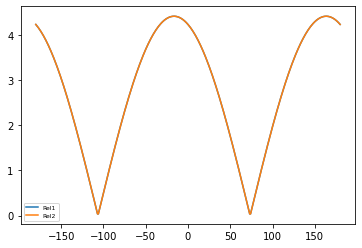

optimal gouy f1 =343
optimal gouy f2 =164


--------------------------------------------------------------
Running kat - Started at 2021-10-05 18:45:29.052409
Used Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.085397 seconds
100% | ETA:  0:00:00 | Calculating

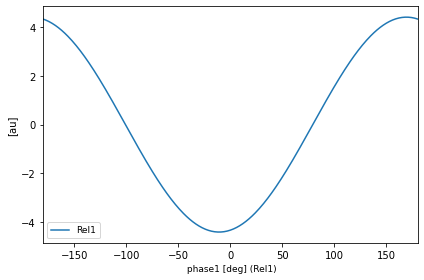

mokushi phase = 349
optimal demod phase = 169
169
--------------------------------------------------------------
Running kat - Started at 2021-10-05 18:45:29.441450
Used Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.0806973 seconds
100% | ETA:  0:00:00 | Calculating

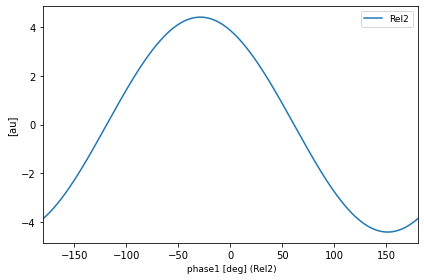

mokushi phase = 151
optimal demod phase = -29
331
1
--------------------------------------------------------------
Running kat - Started at 2021-10-05 18:45:29.788157
Used Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.097683 seconds
100% | ETA:  0:00:00 | Calculating

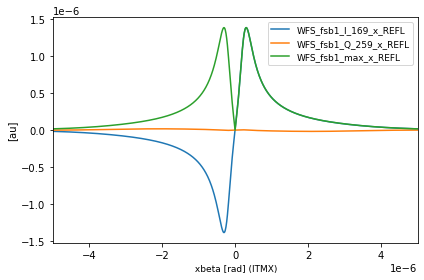

1
--------------------------------------------------------------
Running kat - Started at 2021-10-05 18:45:30.167494
Used Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.108373 seconds
100% | ETA:  0:00:00 | Calculating

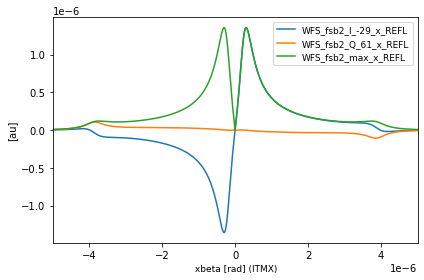


0: node nx4(13); ITMX(1), sx1(10); n=1  (ITMX --> nx4)
   x, y: w0=16.1969667343171mm w=35.3004705933891mm z=-1.5km z_R=774.596669241483m Rc=-1.9km
   q=(-1500 + 774.596669241483i) gamma=20.9101941403619urad
1: node nx5(14); sx1(10), ETMX(2); n=1  (sx1 --> nx5)
   x, y: w0=16.1969667343171mm w=35.3004705933891mm z=1.5km z_R=774.596669241483m Rc=1.9km
   q=(1500 + 774.596669241483i) gamma=20.9101941403619urad
2: node nTMSX(15); ETMX(2), ---(-32768); n=1  (ETMX --> nTMSX)
   x, y: w0=16.1969667343171mm w=35.3004705933891mm z=1.5km z_R=774.596669241483m Rc=1.9km
   q=(1500 + 774.596669241483i) gamma=20.9101941403619urad
3: node nx3(12); ITMX(1), thick_IX(9); n=1.754  (ITMX --> nx3)
   x, y: w0=9.96976239181554mm w=35.3004705933891mm z=1.74844780642159km z_R=514.763149827722m Rc=1.9km
   q=(1748.44780642159 + 514.763149827722i) gamma=19.3676691798008urad
4: node nx2(11); thick_IX(9), IXAR(0); n=1.754  (thick_IX --> nx2)
   x, y: w0=9.96976239181554mm w=35.303257482181mm z=1.74859780642159

In [30]:
base = Load_fp_model()
DoF = "ITMX_ETMX_2"
### Step1 gouy phase
model = base.deepcopy()
model = fp_xaxis_fsig(model, DoF)
min = -5e-6
max = 5e-6
model.parse(
"""
# ======== Constants ========================
const f1 16.881M
const f2 45.0159M
const mf1 -16.881M
const mf2 -45.0159M
const a 0.686
const phi_PRM 90
const pi 3.1415
const phi_SRM 90
maxtem 1

#fsb1
pd2 ReI1 $f1 max 10 0 nREFL2
pdtype ReI1 x-split
#fsb2
pd2 ReI2 $f2 max 10 0 nREFL2
pdtype ReI2 x-split

xaxis* sgouy gx lin -180 180 360
put* sgouy gy $x1
"""
)
model.xaxis.limit = min, max
out = model.run()
#out.plot()
plt.plot(out.x, (out["ReI1"]), label="ReI1")
plt.plot(out.x, (out["ReI2"]), label="ReI2")
plt.legend(fontsize=6)
plt.show()

gouy_fsb1 = out["ReI1"].argmax()
gouy_fsb2 = out["ReI2"].argmax()

print("optimal gouy f1 =%s"%gouy_fsb1)
print("optimal gouy f2 =%s"%gouy_fsb2)
print("\n")

## Step2 demod phase

# fsb1
model = base.deepcopy()
model = fp_xaxis_fsig(model, DoF)
model.parse("""
const f1 16.881M
const f2 45.0159M
pd2 ReI1 $f1 0 10 0 nREFL2
pdtype ReI1 x-split
xaxis* ReI1 phase1 lin -180 180 360
""")
model.components["sgouy"].gouy = gouy_fsb1
out = model.run()
out.plot()
print("mokushi phase = "+str(out["ReI1"].argmax()))
optimal_demod_phase1 = out["ReI1"].argmax()-180

print("optimal demod phase = "+str(optimal_demod_phase1))
print(out["ReI1"].argmin())

# fsb2
model = base.deepcopy()
model = fp_xaxis_fsig(model, DoF)
model.parse("""
const fsb1 16.881M
#const fsb1 16.875M
const fsb2 45.0159M
pd2 ReI2 $fsb2 0 10 0 nREFL2
pdtype ReI2 x-split
xaxis* ReI2 phase1 lin -180 180 360
""")
model.components["sgouy"].gouy = gouy_fsb2
out = model.run()
out.plot()
print("mokushi phase = "+str(out["ReI2"].argmax()))
optimal_demod_phase2 = out["ReI2"].argmax()-180

print("optimal demod phase = "+str(optimal_demod_phase2))
print(out["ReI2"].argmin())

## Step3

# fsb1
model = base.deepcopy()
model = fp_xaxis_DoF(model,DoF)
model.xaxis.limits = min,max
model.parse("""
const fsb1 16.881M
#const fsb1 16.875M
const fsb2 45.0159M

# REFL

# max 
pd1 WFS_fsb1_max_x_REFL $fsb1 max nREFL2
pdtype WFS_fsb1_max_x_REFL x-split

# Q
pd1 WFS_fsb1_Q_%s_x_REFL $fsb1 %s nREFL2
pdtype WFS_fsb1_Q_%s_x_REFL x-split
# I
pd1 WFS_fsb1_I_%s_x_REFL $fsb1 %s nREFL2
pdtype WFS_fsb1_I_%s_x_REFL x-split

"""%(optimal_demod_phase1+90,optimal_demod_phase1+90,optimal_demod_phase1+90,optimal_demod_phase1,optimal_demod_phase1,optimal_demod_phase1)
)
model.components["sgouy"].gouy = gouy_fsb1
print(model.maxtem)
out = model.run()
out.plot()

# fsb2
model = base.deepcopy()
model = fp_xaxis_DoF(model,DoF)
model.xaxis.limits = min,max
model.parse("""
const fsb1 16.881M
#const fsb1 16.875M
const fsb2 45.0159M

# REFL

# max 
pd1 WFS_fsb2_max_x_REFL $fsb2 max nREFL2
pdtype WFS_fsb2_max_x_REFL x-split

# Q
pd1 WFS_fsb2_Q_%s_x_REFL $fsb2 %s nREFL2
pdtype WFS_fsb2_Q_%s_x_REFL x-split
# I
pd1 WFS_fsb2_I_%s_x_REFL $fsb2 %s nREFL2
pdtype WFS_fsb2_I_%s_x_REFL x-split

"""%(optimal_demod_phase2+90,optimal_demod_phase2+90,optimal_demod_phase2+90,optimal_demod_phase2,optimal_demod_phase2,optimal_demod_phase2)
)
model.components["sgouy"].gouy = gouy_fsb2
print(model.maxtem)
out2 = model.run()
out2.plot()

print(out.rundata)

# amplitude check

--------------------------------------------------------------
Running kat - Started at 2021-10-05 18:45:30.686777
Used Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.100009 seconds
100% | ETA:  0:00:00 | Calculating

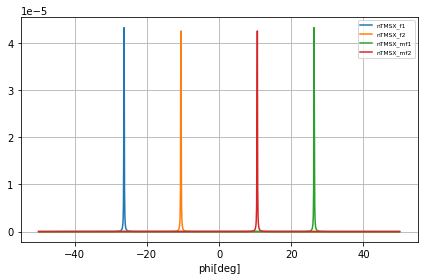

In [31]:
base = Load_fp_model()
###
model = base.deepcopy()
model.parse("""
# ======== Constants ========================
const f1 16.881M
const f2 45.0159M
const mf1 -16.881M
const mf2 -45.0159M
const a 0.686
const phi_PRM 90
const pi 3.1415
const phi_SRM 90
maxtem 1

pd REFL_pd nREFL2
ad REFL_ca 0 0 0 nREFL2
ad REFL_f1 0 0 $f1 nREFL2
ad REFL_f2 0 0 $f2 nREFL2
pd nTMSX_pd nTMSX
ad nTMSX_ca 0 0 0 nTMSX
ad nTMSX_f1 0 0 $f1 nTMSX
ad nTMSX_f2 0 0 $f2 nTMSX
ad nTMSX_mf1 0 0 $mf1 nTMSX
ad nTMSX_mf2 0 0 $mf2 nTMSX
""")
#model = fp_xaxis_DoF(model,DoF)
model.parse("""
xaxis ETMX phi lin -50 50 1000
""")
out = model.run()
#out.plot()

#plt.plot(out.x, (out["REFL_pd"]), label="REFL")
#plt.plot(out.x, (out["REFL_ca"])**2, label="REFL_ca")
#plt.plot(out.x, (out["REFL_f1"])**2, label="REFL_f1")
#plt.plot(out.x, (out["REFL_f2"])**2, label="REFL_f2")
#plt.plot(out.x, (out["nTMSX_pd"]), label="nTMSX")
#plt.plot(out.x, (out["nTMSX_ca"])**2, label="nTMSX_ca")
plt.plot(out.x, (out["nTMSX_f1"])**2, label="nTMSX_f1")
plt.plot(out.x, (out["nTMSX_f2"])**2, label="nTMSX_f2")
plt.plot(out.x, (out["nTMSX_mf1"])**2, label="nTMSX_mf1")
plt.plot(out.x, (out["nTMSX_mf2"])**2, label="nTMSX_mf2")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel(out.xlabel.split()[0]+out.xlabel.split()[1])
plt.grid()
plt.legend(fontsize=6)
#plt.ticklabel_format(style='sci',axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci',axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show(block=False)



# CP check

--------------------------------------------------------------
Running kat - Started at 2021-10-05 18:45:31.057303
Used Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.0824671 seconds
100% | ETA:  0:00:00 | Calculating

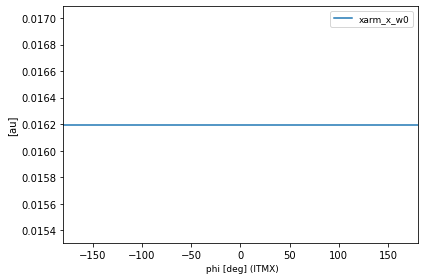

In [32]:
model = Load_fp_model()
model.parse(
"""
#cp xarm x w
cp xarm x w0
#cp xarm x zr
#pd input nx3
#ad input_ca 0 0 0 nx3
xaxis ITMX phi lin -180 180 1000
"""
)
out = model.run()
out.plot()
#print(out.rundata)


# MIYAZAKI san thesis

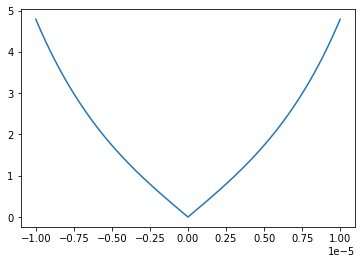

In [33]:
#theta = 5e-6 # mirror misalign angle
i = 0 + 1j
ramda = 1064e-9
w_0 = 16.197e-3 # これだけfinesseのcpから持ってきた
theta = np.linspace(-1e-5, 1e-5, 1000)
beta = i*2*theta / (ramda/pi/w_0)
j_0 = special.jn(0,beta)
P_i0 = 1 #W
RT_gouy = -109.246919696117 #deg
finesse_value = 1546.43
#P_dc_max = np.sqrt(8/pi)*P_i0*j_0**2*np.abs(beta)*(-1+ (2*np.exp(i*RT_gouy)) / (1-(1-pi/finesse)*np.exp(i*RT_gouy) ) ) # 4.41
P_dc_max = np.sqrt(8/pi)*P_i0*j_0**2*np.abs(beta)* np.sqrt(3+2/(1-np.cos(RT_gouy))) # 4.45
plt.plot(theta, P_dc_max)
plt.show()

# PRFP

## Calculated by finesse tool

In [35]:
base = Load_prfp_model()
base.parse("""
s stest 100 nTMSX ntest
m mtest 0.99 0.01 0 ntest ntest_trans
cp xarm  x w
cp xarm  x w0
cp xarm  x zr
cp PRX  x r
bp XARM_q x q nx3
bp prm_w x w npr1
bp prm_w0 x w0 npr1
bp prm_z x z npr1
bp prm_r x r npr1
bp prm_q x q npr1
cav PRX PRM npr1 ITMX nx3
#attr PRM Rc 1144
attr PRM Rc -1144
noxaxis
retrace
""")
out = base.run()
print(out.rundata)

--------------------------------------------------------------
Running kat - Started at 2021-10-05 18:46:08.649125
Used Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.0600867 seconds

 'noxaxis' has been set, ignoring all other xaxis commands
0: node nx4(15); ITMX(2), sx1(13); n=1  (ITMX --> nx4)
   x, y: w0=16.1969667343171mm w=35.3004705933891mm z=-1.5km z_R=774.596669241483m Rc=-1.9km
   q=(-1500 + 774.596669241483i) gamma=20.9101941403619urad
1: node nx5(16); sx1(13), ETMX(3); n=1  (sx1 --> nx5)
   x, y: w0=16.1969667343171mm w=35.3004705933891mm z=1.5km z_R=774.596669241483m Rc=1.9km
   q=(1500 + 774.596669241483i) gamma=20.9101941403619urad
2: node nTMSX(17); ETMX(3), stest(14); n=1  (ETMX --> nTMSX)
   x, y: w0=16.1969667343171mm w=35.3004705933891mm z=1.5km z_R=774.596669241483m Rc=1.9km
   q=(1500 + 774.596669241483i) gamma=20.9101941403619urad
3: node ntest(18); stest(14), mtest(4); n=1  (stest --> ntest)
   x, y: w0=16.1969667343171mm w

In [36]:
print(out["XARM_q"])
print(out["prm_w"])
print(out["prm_w0"])
print(out["xarm_x_w"])
print(out["xarm_x_w0"])
print(out["xarm_x_zr"])
print("PRX_r=%s"%out["PRX_x_r"])
print(out["prm_z"])
# PRMでのRc
print("prm_r=%s"%out["prm_r"])
print(out["prm_q"])

1815.89660392154
0.0366519661493163
0.0101570859931523
0.0353004705933891
0.0161969667343171
774.596669241483
PRX_r=-1144.0
-1056.14434325565
prm_r=-1144.0
1099.19476376321


## Calculated by q parameter

## ITM thickness + lens

Cavityの中央からPRMまで伝搬するレーザーのqパラメータを計算して、PRMでの曲率半径Rcを求める。

finesseツールではPRMでのRcが1144mになった

レンズはよくわからない

<img src="./fig/スクリーンショット 2021-09-25 16.50.39.png" style="width: 600px;"/>

In [37]:
# ITM lens

q0 = 0+774.596669241483j#obtained from FINESSE

q1 = ABCD_transform("space",q0,L=1500)#proparagate z0 to -1500(ITM)
print(q1)
Rc = calculate_beam_parameters(q1,"Rc")
print(Rc)

q2 = ABCD_transform("mirror",q1,n1=1,n2=1.754,Rc=1900,is_transmit=True) #transmit ITM
print(q2)

q3 = ABCD_transform("space",q2,n1=1.754,L=0.15)#propagate ITM thickness
print(q3)

q4 = ABCD_transform("mirror",q3,n1=1,n2=1.754,Rc=10e100,is_transmit=True,is_inverse_propagation=True) # Rc:平面
print(q4)

#q4=-1735.5160400704 + 534.288827126406j
q5 = ABCD_transform("space",q4,n1=1,L=66.597)#propagate ITM thickness
print("q5=%s"%q5)

#q6 = ABCD_transform("lens",q5,f=1)
#print(q5)

#q7 = ABCD_transform("space",q6,L=1)
#print(q7)

#q8 = ABCD_transform("space",q7,L=66.597)
#print(q8)
#Rc = abs(q8)**2/np.real(q8)

print("\n")
print("Rc=1144くらいにならない")
Rc = calculate_beam_parameters(q5,"Rc")
print("Rc = %s"%Rc)

w = calculate_beam_parameters(q5,"Rc")
print(w)
Rc = calculate_beam_parameters(q2,"Rc")
print(Rc)

(1500+774.596669241483j)
1899.9999999999998
(1748.4478064215855+514.7631498277223j)
(996.9200720761605+293.47956090520086j)
(1748.5978064215856+514.7631498277223j)
q5=(-1668.9190400704001+534.288827126406j)


Rc=1144くらいにならない
Rc = -1839.966612743589
-1839.966612743589
1899.9999999999998


## ignore ITM thickness
<img src="./fig/スクリーンショット 2021-09-25 15.59.05.png" style="width: 400px;"/>

In [100]:
# ignore ITM thickness
q0 = 0+774.596669241483j # calculated by finesse tool
#
q1 = ABCD_transform("space",q0,L=1500)#proparagating z0 to -1500(ITM)
#print(q1)
Rc = abs(q1)**2/np.real(q1)
print("Rc_q1 = %f"%Rc)
#
q2 = ABCD_transform("mirror",q1,n1=1,n2=1.754,Rc=1900) #transmit ITM (n1->n2:Rc=1900, n2->n1:Rc=-1900)
#print(q2)
Rc = abs(q2)**2/np.real(q2)
print("Rc_q2 = %f"%Rc)
#
q3 = ABCD_transform("space",q2,n1=1,L=66.597)
Rc = abs(q3)**2/np.real(q3)
print("Rc=1144くらいにならない")
print("Rc_q3 = %f"%Rc)


print("\n")
w = calculate_beam_parameters(q3,"w")
print(w)
Rc = calculate_beam_parameters(q3,"Rc")
print(Rc)

Rc_q1 = 1900.000000
Rc_q2 = 1900.000000
Rc=1144くらいにならない
Rc_q3 = 1961.036299


0.04839256525691155
1961.0362990189367
